# Susceptibility to substitution

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
BIN_COUNT = 4

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from progressbar import ProgressBar
from statsmodels.stats.proportion import multinomial_proportions_confint

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope, stopwords
engine = init_db()

## 2 Susceptibility in absolute and sentence-relative values

Build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.all, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        # Prepare these arrays for stopword-checking.
        dslice = slice(substitution.start,
                       substitution.start + len(substitution.destination.tokens))
        lemmas = substitution.source.lemmas[dslice]
        tokens = substitution.source.tokens[dslice]
        tags = substitution.source.tags[dslice]
        
        for feature in Substitution.__features__:
            sentence_values, _ = substitution.source_destination_features(feature)
            sentence_values_rel, _ = substitution.source_destination_features(
                feature, sentence_relative='median')
            source_type, _ = Substitution.__features__[feature]
            # Stopword-check the arrays.
            words = getattr(substitution.source, source_type)[dslice]
            for i, (word, lemma, token, tag) in enumerate(zip(words, lemmas, tokens, tags)):
                if (token in stopwords) or (lemma in stopwords):
                    # Drop stopwords from this analysis since we exclude stopword-substitutions.
                    continue
                data.append({'cluster_id': substitution.source.cluster.sid,
                             'destination_id': substitution.destination.sid,
                             'occurrence': substitution.occurrence,
                             'source_id': substitution.source.sid,
                             'feature': feature,
                             'word': word,
                             'POS': tag,
                             'target': i == substitution.position,
                             'value': sentence_values[i],
                             'value_rel': sentence_values_rel[i]})

original_susties = pd.DataFrame(data)
del data

Got 24971 substitutions for model Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.all, max_distance=2)


  0% (    1 of 24971) |             | Elapsed Time: 0:00:04 ETA:  1 day, 6:19:23

  0% (   81 of 24971) |                    | Elapsed Time: 0:00:05 ETA:  0:05:08

  0% (  168 of 24971) |                    | Elapsed Time: 0:00:06 ETA:  0:04:53

  1% (  258 of 24971) |                    | Elapsed Time: 0:00:07 ETA:  0:04:44

  1% (  313 of 24971) |                    | Elapsed Time: 0:00:07 ETA:  0:04:41

  1% (  405 of 24971) |                    | Elapsed Time: 0:00:08 ETA:  0:04:36

  1% (  490 of 24971) |                    | Elapsed Time: 0:00:10 ETA:  0:04:37

  2% (  580 of 24971) |                    | Elapsed Time: 0:00:11 ETA:  0:04:35

  2% (  625 of 24971) |                    | Elapsed Time: 0:00:11 ETA:  0:04:36

  2% (  707 of 24971) |                    | Elapsed Time: 0:00:12 ETA:  0:04:37

  3% (  786 of 24971) |                    | Elapsed Time: 0:00:13 ETA:  0:04:37

  3% (  882 of 24971) |                    | Elapsed Time: 0:00:14 ETA:  0:04:32

  3% (  937 of 24971) |                    | Elapsed Time: 0:00:15 ETA:  0:04:30

  4% ( 1026 of 24971) |                    | Elapsed Time: 0:00:16 ETA:  0:04:29

  4% ( 1115 of 24971) |                    | Elapsed Time: 0:00:17 ETA:  0:04:29

  4% ( 1180 of 24971) |                    | Elapsed Time: 0:00:18 ETA:  0:04:37

  5% ( 1249 of 24971) |#                   | Elapsed Time: 0:00:19 ETA:  0:04:39

  5% ( 1330 of 24971) |#                   | Elapsed Time: 0:00:20 ETA:  0:04:39

  5% ( 1418 of 24971) |#                   | Elapsed Time: 0:00:21 ETA:  0:04:35

  6% ( 1510 of 24971) |#                   | Elapsed Time: 0:00:22 ETA:  0:04:29

  6% ( 1561 of 24971) |#                   | Elapsed Time: 0:00:22 ETA:  0:04:31

  6% ( 1649 of 24971) |#                   | Elapsed Time: 0:00:23 ETA:  0:04:33

  6% ( 1726 of 24971) |#                   | Elapsed Time: 0:00:24 ETA:  0:04:37

  7% ( 1806 of 24971) |#                   | Elapsed Time: 0:00:25 ETA:  0:04:40

  7% ( 1873 of 24971) |#                   | Elapsed Time: 0:00:26 ETA:  0:04:29

  7% ( 1964 of 24971) |#                   | Elapsed Time: 0:00:27 ETA:  0:04:24

  8% ( 2060 of 24971) |#                   | Elapsed Time: 0:00:28 ETA:  0:04:17

  8% ( 2149 of 24971) |#                   | Elapsed Time: 0:00:29 ETA:  0:04:16

  8% ( 2185 of 24971) |#                   | Elapsed Time: 0:00:29 ETA:  0:04:18

  9% ( 2267 of 24971) |#                   | Elapsed Time: 0:00:30 ETA:  0:04:20

  9% ( 2347 of 24971) |#                   | Elapsed Time: 0:00:31 ETA:  0:04:22

  9% ( 2421 of 24971) |#                   | Elapsed Time: 0:00:32 ETA:  0:04:23

 10% ( 2498 of 24971) |##                  | Elapsed Time: 0:00:33 ETA:  0:04:20

 10% ( 2579 of 24971) |##                  | Elapsed Time: 0:00:34 ETA:  0:04:22

 10% ( 2649 of 24971) |##                  | Elapsed Time: 0:00:35 ETA:  0:04:31

 10% ( 2736 of 24971) |##                  | Elapsed Time: 0:00:36 ETA:  0:04:34

 11% ( 2810 of 24971) |##                  | Elapsed Time: 0:00:37 ETA:  0:04:37

 11% ( 2878 of 24971) |##                  | Elapsed Time: 0:00:38 ETA:  0:04:49

 11% ( 2947 of 24971) |##                  | Elapsed Time: 0:00:39 ETA:  0:04:54

 12% ( 3031 of 24971) |##                  | Elapsed Time: 0:00:40 ETA:  0:04:51

 12% ( 3122 of 24971) |##                  | Elapsed Time: 0:00:41 ETA:  0:04:46

 12% ( 3204 of 24971) |##                  | Elapsed Time: 0:00:42 ETA:  0:04:44

 13% ( 3286 of 24971) |##                  | Elapsed Time: 0:00:43 ETA:  0:04:37

 13% ( 3367 of 24971) |##                  | Elapsed Time: 0:00:44 ETA:  0:04:39

 13% ( 3434 of 24971) |##                  | Elapsed Time: 0:00:45 ETA:  0:04:36

 14% ( 3529 of 24971) |##                  | Elapsed Time: 0:00:46 ETA:  0:04:14

 14% ( 3602 of 24971) |##                  | Elapsed Time: 0:00:47 ETA:  0:04:12

 14% ( 3693 of 24971) |##                  | Elapsed Time: 0:00:48 ETA:  0:04:08

 15% ( 3746 of 24971) |###                 | Elapsed Time: 0:00:49 ETA:  0:04:05

 15% ( 3832 of 24971) |###                 | Elapsed Time: 0:00:50 ETA:  0:04:04

 15% ( 3921 of 24971) |###                 | Elapsed Time: 0:00:51 ETA:  0:04:00

 16% ( 4005 of 24971) |###                 | Elapsed Time: 0:00:52 ETA:  0:03:59

 16% ( 4058 of 24971) |###                 | Elapsed Time: 0:00:52 ETA:  0:03:54

 16% ( 4154 of 24971) |###                 | Elapsed Time: 0:00:53 ETA:  0:03:49

 16% ( 4242 of 24971) |###                 | Elapsed Time: 0:00:54 ETA:  0:03:51

 17% ( 4320 of 24971) |###                 | Elapsed Time: 0:00:55 ETA:  0:03:48

 17% ( 4370 of 24971) |###                 | Elapsed Time: 0:00:56 ETA:  0:03:50

 17% ( 4460 of 24971) |###                 | Elapsed Time: 0:00:57 ETA:  0:03:51

 18% ( 4525 of 24971) |###                 | Elapsed Time: 0:00:58 ETA:  0:03:59

 18% ( 4606 of 24971) |###                 | Elapsed Time: 0:00:59 ETA:  0:04:02

 18% ( 4683 of 24971) |###                 | Elapsed Time: 0:01:00 ETA:  0:04:12

 19% ( 4769 of 24971) |###                 | Elapsed Time: 0:01:01 ETA:  0:04:16

 19% ( 4855 of 24971) |###                 | Elapsed Time: 0:01:02 ETA:  0:04:16

 19% ( 4932 of 24971) |###                 | Elapsed Time: 0:01:03 ETA:  0:04:16

 20% ( 4995 of 24971) |####                | Elapsed Time: 0:01:04 ETA:  0:04:10

 20% ( 5085 of 24971) |####                | Elapsed Time: 0:01:05 ETA:  0:04:09

 20% ( 5136 of 24971) |####                | Elapsed Time: 0:01:06 ETA:  0:04:15

 20% ( 5228 of 24971) |####                | Elapsed Time: 0:01:07 ETA:  0:04:08

 21% ( 5307 of 24971) |####                | Elapsed Time: 0:01:08 ETA:  0:03:56

 21% ( 5405 of 24971) |####                | Elapsed Time: 0:01:09 ETA:  0:03:49

 22% ( 5509 of 24971) |####                | Elapsed Time: 0:01:10 ETA:  0:03:40

 22% ( 5619 of 24971) |####                | Elapsed Time: 0:01:11 ETA:  0:03:30

 22% ( 5720 of 24971) |####                | Elapsed Time: 0:01:12 ETA:  0:03:25

 23% ( 5812 of 24971) |####                | Elapsed Time: 0:01:13 ETA:  0:03:24

 23% ( 5931 of 24971) |####                | Elapsed Time: 0:01:14 ETA:  0:03:01

 24% ( 6024 of 24971) |####                | Elapsed Time: 0:01:15 ETA:  0:02:59

 24% ( 6111 of 24971) |####                | Elapsed Time: 0:01:16 ETA:  0:03:02

 24% ( 6172 of 24971) |####                | Elapsed Time: 0:01:17 ETA:  0:03:18

 25% ( 6243 of 24971) |#####               | Elapsed Time: 0:01:18 ETA:  0:03:21

 25% ( 6339 of 24971) |#####               | Elapsed Time: 0:01:19 ETA:  0:03:19

 25% ( 6425 of 24971) |#####               | Elapsed Time: 0:01:20 ETA:  0:03:24

 26% ( 6517 of 24971) |#####               | Elapsed Time: 0:01:21 ETA:  0:03:23

 26% ( 6555 of 24971) |#####               | Elapsed Time: 0:01:22 ETA:  0:03:29

 26% ( 6654 of 24971) |#####               | Elapsed Time: 0:01:23 ETA:  0:03:24

 27% ( 6746 of 24971) |#####               | Elapsed Time: 0:01:24 ETA:  0:03:24

 27% ( 6844 of 24971) |#####               | Elapsed Time: 0:01:25 ETA:  0:03:18

 27% ( 6868 of 24971) |#####               | Elapsed Time: 0:01:25 ETA:  0:03:06

 27% ( 6953 of 24971) |#####               | Elapsed Time: 0:01:26 ETA:  0:03:05

 28% ( 7040 of 24971) |#####               | Elapsed Time: 0:01:27 ETA:  0:03:07

 28% ( 7130 of 24971) |#####               | Elapsed Time: 0:01:28 ETA:  0:03:04

 28% ( 7180 of 24971) |#####               | Elapsed Time: 0:01:28 ETA:  0:03:04

 29% ( 7270 of 24971) |#####               | Elapsed Time: 0:01:29 ETA:  0:03:04

 29% ( 7357 of 24971) |#####               | Elapsed Time: 0:01:30 ETA:  0:03:07

 29% ( 7443 of 24971) |#####               | Elapsed Time: 0:01:31 ETA:  0:03:08

 30% ( 7492 of 24971) |######              | Elapsed Time: 0:01:32 ETA:  0:03:09

 30% ( 7585 of 24971) |######              | Elapsed Time: 0:01:33 ETA:  0:03:07

 30% ( 7693 of 24971) |######              | Elapsed Time: 0:01:34 ETA:  0:02:57

 31% ( 7804 of 24971) |######              | Elapsed Time: 0:01:35 ETA:  0:02:47

 31% ( 7911 of 24971) |######              | Elapsed Time: 0:01:36 ETA:  0:02:41

 31% ( 7990 of 24971) |######              | Elapsed Time: 0:01:37 ETA:  0:02:44

 32% ( 8082 of 24971) |######              | Elapsed Time: 0:01:38 ETA:  0:02:41

 32% ( 8116 of 24971) |######              | Elapsed Time: 0:01:38 ETA:  0:02:37

 32% ( 8204 of 24971) |######              | Elapsed Time: 0:01:40 ETA:  0:02:56

 33% ( 8299 of 24971) |######              | Elapsed Time: 0:01:41 ETA:  0:02:54

 33% ( 8402 of 24971) |######              | Elapsed Time: 0:01:42 ETA:  0:02:55

 33% ( 8428 of 24971) |######              | Elapsed Time: 0:01:42 ETA:  0:03:01

 34% ( 8508 of 24971) |######              | Elapsed Time: 0:01:43 ETA:  0:03:04

 34% ( 8584 of 24971) |######              | Elapsed Time: 0:01:44 ETA:  0:03:16

 34% ( 8642 of 24971) |######              | Elapsed Time: 0:01:45 ETA:  0:03:25

 34% ( 8719 of 24971) |######              | Elapsed Time: 0:01:46 ETA:  0:03:31

 35% ( 8740 of 24971) |#######             | Elapsed Time: 0:01:46 ETA:  0:03:33

 35% ( 8809 of 24971) |#######             | Elapsed Time: 0:01:47 ETA:  0:03:23

 35% ( 8883 of 24971) |#######             | Elapsed Time: 0:01:48 ETA:  0:03:33

 35% ( 8980 of 24971) |#######             | Elapsed Time: 0:01:49 ETA:  0:03:36

 36% ( 9052 of 24971) |#######             | Elapsed Time: 0:01:50 ETA:  0:03:35

 36% ( 9131 of 24971) |#######             | Elapsed Time: 0:01:51 ETA:  0:03:34

 36% ( 9219 of 24971) |#######             | Elapsed Time: 0:01:52 ETA:  0:03:28

 37% ( 9305 of 24971) |#######             | Elapsed Time: 0:01:53 ETA:  0:03:13

 37% ( 9365 of 24971) |#######             | Elapsed Time: 0:01:54 ETA:  0:03:14

 37% ( 9456 of 24971) |#######             | Elapsed Time: 0:01:55 ETA:  0:03:09

 38% ( 9540 of 24971) |#######             | Elapsed Time: 0:01:56 ETA:  0:03:02

 38% ( 9632 of 24971) |#######             | Elapsed Time: 0:01:57 ETA:  0:02:54

 38% ( 9677 of 24971) |#######             | Elapsed Time: 0:01:58 ETA:  0:02:56

 39% ( 9781 of 24971) |#######             | Elapsed Time: 0:01:59 ETA:  0:02:47

 39% ( 9876 of 24971) |#######             | Elapsed Time: 0:02:00 ETA:  0:02:40

 40% ( 9989 of 24971) |########            | Elapsed Time: 0:02:01 ETA:  0:02:33

 40% (10078 of 24971) |########            | Elapsed Time: 0:02:02 ETA:  0:02:27

 40% (10177 of 24971) |########            | Elapsed Time: 0:02:03 ETA:  0:02:23

 41% (10262 of 24971) |########            | Elapsed Time: 0:02:04 ETA:  0:02:22

 41% (10301 of 24971) |########            | Elapsed Time: 0:02:04 ETA:  0:02:20

 41% (10388 of 24971) |########            | Elapsed Time: 0:02:05 ETA:  0:02:22

 41% (10471 of 24971) |########            | Elapsed Time: 0:02:06 ETA:  0:02:29

 42% (10547 of 24971) |########            | Elapsed Time: 0:02:07 ETA:  0:02:35

 42% (10613 of 24971) |########            | Elapsed Time: 0:02:08 ETA:  0:02:42

 42% (10707 of 24971) |########            | Elapsed Time: 0:02:09 ETA:  0:02:39

 43% (10794 of 24971) |########            | Elapsed Time: 0:02:10 ETA:  0:02:39

 43% (10870 of 24971) |########            | Elapsed Time: 0:02:11 ETA:  0:02:49

 43% (10925 of 24971) |########            | Elapsed Time: 0:02:12 ETA:  0:02:46

 44% (11008 of 24971) |########            | Elapsed Time: 0:02:13 ETA:  0:02:48

 44% (11100 of 24971) |########            | Elapsed Time: 0:02:14 ETA:  0:02:45

 44% (11183 of 24971) |########            | Elapsed Time: 0:02:15 ETA:  0:02:44

 45% (11237 of 24971) |#########           | Elapsed Time: 0:02:15 ETA:  0:02:41

 45% (11327 of 24971) |#########           | Elapsed Time: 0:02:16 ETA:  0:02:34

 45% (11421 of 24971) |#########           | Elapsed Time: 0:02:17 ETA:  0:02:34

 46% (11500 of 24971) |#########           | Elapsed Time: 0:02:18 ETA:  0:02:37

 46% (11550 of 24971) |#########           | Elapsed Time: 0:02:19 ETA:  0:02:29

 46% (11638 of 24971) |#########           | Elapsed Time: 0:02:20 ETA:  0:02:29

 46% (11720 of 24971) |#########           | Elapsed Time: 0:02:21 ETA:  0:02:28

 47% (11806 of 24971) |#########           | Elapsed Time: 0:02:22 ETA:  0:02:29

 47% (11862 of 24971) |#########           | Elapsed Time: 0:02:23 ETA:  0:02:24

 47% (11948 of 24971) |#########           | Elapsed Time: 0:02:24 ETA:  0:02:22

 47% (11978 of 24971) |#########           | Elapsed Time: 0:02:25 ETA:  0:02:51

 48% (12051 of 24971) |#########           | Elapsed Time: 0:02:26 ETA:  0:03:00

 48% (12129 of 24971) |#########           | Elapsed Time: 0:02:27 ETA:  0:02:59

 48% (12174 of 24971) |#########           | Elapsed Time: 0:02:27 ETA:  0:02:58

 49% (12268 of 24971) |#########           | Elapsed Time: 0:02:28 ETA:  0:02:54

 49% (12361 of 24971) |#########           | Elapsed Time: 0:02:29 ETA:  0:02:47

 49% (12454 of 24971) |#########           | Elapsed Time: 0:02:30 ETA:  0:02:43

 50% (12486 of 24971) |##########          | Elapsed Time: 0:02:30 ETA:  0:02:45

 50% (12580 of 24971) |##########          | Elapsed Time: 0:02:32 ETA:  0:02:40

 50% (12665 of 24971) |##########          | Elapsed Time: 0:02:33 ETA:  0:02:10

 51% (12760 of 24971) |##########          | Elapsed Time: 0:02:34 ETA:  0:02:01

 51% (12798 of 24971) |##########          | Elapsed Time: 0:02:34 ETA:  0:01:54

 51% (12889 of 24971) |##########          | Elapsed Time: 0:02:35 ETA:  0:01:56

 51% (12981 of 24971) |##########          | Elapsed Time: 0:02:36 ETA:  0:01:55

 52% (13069 of 24971) |##########          | Elapsed Time: 0:02:37 ETA:  0:01:56

 52% (13110 of 24971) |##########          | Elapsed Time: 0:02:37 ETA:  0:01:55

 52% (13196 of 24971) |##########          | Elapsed Time: 0:02:38 ETA:  0:01:57

 53% (13276 of 24971) |##########          | Elapsed Time: 0:02:39 ETA:  0:02:02

 53% (13362 of 24971) |##########          | Elapsed Time: 0:02:40 ETA:  0:02:00

 53% (13422 of 24971) |##########          | Elapsed Time: 0:02:41 ETA:  0:01:58

 54% (13514 of 24971) |##########          | Elapsed Time: 0:02:42 ETA:  0:01:58

 54% (13610 of 24971) |##########          | Elapsed Time: 0:02:43 ETA:  0:01:55

 54% (13711 of 24971) |##########          | Elapsed Time: 0:02:44 ETA:  0:01:51

 55% (13735 of 24971) |###########         | Elapsed Time: 0:02:44 ETA:  0:01:50

 55% (13822 of 24971) |###########         | Elapsed Time: 0:02:45 ETA:  0:01:53

 55% (13907 of 24971) |###########         | Elapsed Time: 0:02:46 ETA:  0:01:52

 56% (14003 of 24971) |###########         | Elapsed Time: 0:02:47 ETA:  0:01:45

 56% (14047 of 24971) |###########         | Elapsed Time: 0:02:48 ETA:  0:01:42

 56% (14147 of 24971) |###########         | Elapsed Time: 0:02:49 ETA:  0:01:41

 57% (14253 of 24971) |###########         | Elapsed Time: 0:02:50 ETA:  0:01:34

 57% (14359 of 24971) |###########         | Elapsed Time: 0:02:51 ETA:  0:01:37

 57% (14464 of 24971) |###########         | Elapsed Time: 0:02:52 ETA:  0:01:30

 58% (14565 of 24971) |###########         | Elapsed Time: 0:02:53 ETA:  0:01:24

 58% (14671 of 24971) |###########         | Elapsed Time: 0:02:54 ETA:  0:01:17

 59% (14769 of 24971) |###########         | Elapsed Time: 0:02:55 ETA:  0:01:14

 59% (14863 of 24971) |###########         | Elapsed Time: 0:02:56 ETA:  0:01:16

 60% (14983 of 24971) |############        | Elapsed Time: 0:02:57 ETA:  0:01:13

 60% (15079 of 24971) |############        | Elapsed Time: 0:02:58 ETA:  0:01:13

 60% (15180 of 24971) |############        | Elapsed Time: 0:02:59 ETA:  0:01:14

 61% (15295 of 24971) |############        | Elapsed Time: 0:03:00 ETA:  0:01:13

 61% (15391 of 24971) |############        | Elapsed Time: 0:03:01 ETA:  0:01:13

 62% (15495 of 24971) |############        | Elapsed Time: 0:03:02 ETA:  0:01:10

 62% (15607 of 24971) |############        | Elapsed Time: 0:03:04 ETA:  0:01:07

 62% (15711 of 24971) |############        | Elapsed Time: 0:03:05 ETA:  0:01:05

 63% (15811 of 24971) |############        | Elapsed Time: 0:03:06 ETA:  0:01:03

 63% (15920 of 24971) |############        | Elapsed Time: 0:03:07 ETA:  0:01:03

 64% (16017 of 24971) |############        | Elapsed Time: 0:03:08 ETA:  0:01:02

 64% (16116 of 24971) |############        | Elapsed Time: 0:03:09 ETA:  0:01:01

 65% (16232 of 24971) |#############       | Elapsed Time: 0:03:10 ETA:  0:01:01

 65% (16336 of 24971) |#############       | Elapsed Time: 0:03:11 ETA:  0:00:59

 65% (16445 of 24971) |#############       | Elapsed Time: 0:03:12 ETA:  0:00:56

 66% (16544 of 24971) |#############       | Elapsed Time: 0:03:13 ETA:  0:00:54

 66% (16646 of 24971) |#############       | Elapsed Time: 0:03:14 ETA:  0:00:52

 66% (16707 of 24971) |#############       | Elapsed Time: 0:03:15 ETA:  0:01:19

 67% (16782 of 24971) |#############       | Elapsed Time: 0:03:16 ETA:  0:01:26

 67% (16856 of 24971) |#############       | Elapsed Time: 0:03:17 ETA:  0:01:27

 67% (16966 of 24971) |#############       | Elapsed Time: 0:03:18 ETA:  0:01:22

 68% (17054 of 24971) |#############       | Elapsed Time: 0:03:19 ETA:  0:01:23

 68% (17168 of 24971) |#############       | Elapsed Time: 0:03:20 ETA:  0:01:32

 69% (17273 of 24971) |#############       | Elapsed Time: 0:03:21 ETA:  0:01:30

 69% (17370 of 24971) |#############       | Elapsed Time: 0:03:22 ETA:  0:01:30

 70% (17480 of 24971) |##############      | Elapsed Time: 0:03:23 ETA:  0:00:47

 70% (17582 of 24971) |##############      | Elapsed Time: 0:03:24 ETA:  0:00:44

 70% (17678 of 24971) |##############      | Elapsed Time: 0:03:25 ETA:  0:00:48

 71% (17792 of 24971) |##############      | Elapsed Time: 0:03:27 ETA:  0:00:43

 71% (17886 of 24971) |##############      | Elapsed Time: 0:03:28 ETA:  0:00:43

 71% (17972 of 24971) |##############      | Elapsed Time: 0:03:29 ETA:  0:00:50

 72% (18055 of 24971) |##############      | Elapsed Time: 0:03:30 ETA:  0:00:54

 72% (18104 of 24971) |##############      | Elapsed Time: 0:03:30 ETA:  0:00:56

 72% (18201 of 24971) |##############      | Elapsed Time: 0:03:31 ETA:  0:00:54

 73% (18305 of 24971) |##############      | Elapsed Time: 0:03:32 ETA:  0:00:52

 73% (18417 of 24971) |##############      | Elapsed Time: 0:03:33 ETA:  0:00:51

 74% (18521 of 24971) |##############      | Elapsed Time: 0:03:34 ETA:  0:00:46

 74% (18616 of 24971) |##############      | Elapsed Time: 0:03:35 ETA:  0:00:44

 75% (18729 of 24971) |###############     | Elapsed Time: 0:03:36 ETA:  0:00:30

 75% (18829 of 24971) |###############     | Elapsed Time: 0:03:37 ETA:  0:00:30

 75% (18925 of 24971) |###############     | Elapsed Time: 0:03:38 ETA:  0:00:29

 76% (19041 of 24971) |###############     | Elapsed Time: 0:03:39 ETA:  0:00:28

 76% (19140 of 24971) |###############     | Elapsed Time: 0:03:40 ETA:  0:00:28

 77% (19248 of 24971) |###############     | Elapsed Time: 0:03:41 ETA:  0:00:25

 77% (19353 of 24971) |###############     | Elapsed Time: 0:03:42 ETA:  0:00:22

 77% (19459 of 24971) |###############     | Elapsed Time: 0:03:43 ETA:  0:00:20

 78% (19560 of 24971) |###############     | Elapsed Time: 0:03:44 ETA:  0:00:19

 78% (19665 of 24971) |###############     | Elapsed Time: 0:03:45 ETA:  0:00:17

 79% (19763 of 24971) |###############     | Elapsed Time: 0:03:47 ETA:  0:00:18

 79% (19869 of 24971) |###############     | Elapsed Time: 0:03:48 ETA:  0:00:14

 80% (19977 of 24971) |################    | Elapsed Time: 0:03:49 ETA:  0:00:17

 80% (20076 of 24971) |################    | Elapsed Time: 0:03:50 ETA:  0:00:17

 80% (20183 of 24971) |################    | Elapsed Time: 0:03:51 ETA:  0:00:16

 81% (20289 of 24971) |################    | Elapsed Time: 0:03:52 ETA:  0:00:15

 81% (20388 of 24971) |################    | Elapsed Time: 0:03:53 ETA:  0:00:15

 82% (20479 of 24971) |################    | Elapsed Time: 0:03:54 ETA:  0:00:17

 82% (20573 of 24971) |################    | Elapsed Time: 0:03:55 ETA:  0:00:20

 82% (20602 of 24971) |################    | Elapsed Time: 0:03:55 ETA:  0:00:20

 82% (20671 of 24971) |################    | Elapsed Time: 0:03:56 ETA:  0:00:30

 83% (20764 of 24971) |################    | Elapsed Time: 0:03:57 ETA:  0:00:32

 83% (20852 of 24971) |################    | Elapsed Time: 0:03:58 ETA:  0:00:38

 83% (20914 of 24971) |################    | Elapsed Time: 0:03:59 ETA:  0:00:42

 84% (20999 of 24971) |################    | Elapsed Time: 0:04:00 ETA:  0:00:43

 84% (21094 of 24971) |################    | Elapsed Time: 0:04:01 ETA:  0:00:44

 84% (21189 of 24971) |################    | Elapsed Time: 0:04:02 ETA:  0:00:41

 85% (21226 of 24971) |#################   | Elapsed Time: 0:04:02 ETA:  0:00:40

 85% (21313 of 24971) |#################   | Elapsed Time: 0:04:03 ETA:  0:00:40

 85% (21408 of 24971) |#################   | Elapsed Time: 0:04:04 ETA:  0:00:29

 86% (21509 of 24971) |#################   | Elapsed Time: 0:04:05 ETA:  0:00:25

 86% (21538 of 24971) |#################   | Elapsed Time: 0:04:05 ETA:  0:00:22

 86% (21639 of 24971) |#################   | Elapsed Time: 0:04:06 ETA:  0:00:17

 87% (21732 of 24971) |#################   | Elapsed Time: 0:04:07 ETA:  0:00:13

 87% (21827 of 24971) |#################   | Elapsed Time: 0:04:08 ETA:  0:00:12

 87% (21850 of 24971) |#################   | Elapsed Time: 0:04:09 ETA:  0:00:13

 87% (21949 of 24971) |#################   | Elapsed Time: 0:04:10 ETA:  0:00:12

 88% (22048 of 24971) |#################   | Elapsed Time: 0:04:11 ETA:  0:00:07

 88% (22138 of 24971) |#################   | Elapsed Time: 0:04:12 ETA:  0:00:08

 88% (22162 of 24971) |#################   | Elapsed Time: 0:04:12 ETA:  0:00:09

 89% (22257 of 24971) |#################   | Elapsed Time: 0:04:13 ETA:  0:00:08

 89% (22353 of 24971) |#################   | Elapsed Time: 0:04:14 ETA:  0:00:10

 89% (22363 of 24971) |#################   | Elapsed Time: 0:04:15 ETA:  0:00:45

 89% (22453 of 24971) |#################   | Elapsed Time: 0:04:16 ETA:  0:00:47

 90% (22474 of 24971) |##################  | Elapsed Time: 0:04:16 ETA:  0:00:45

 90% (22553 of 24971) |##################  | Elapsed Time: 0:04:17 ETA:  0:00:54

 90% (22654 of 24971) |##################  | Elapsed Time: 0:04:18 ETA:  0:00:52

 91% (22759 of 24971) |##################  | Elapsed Time: 0:04:19 ETA:  0:00:44

 91% (22787 of 24971) |##################  | Elapsed Time: 0:04:20 ETA:  0:00:46

 91% (22887 of 24971) |##################  | Elapsed Time: 0:04:21 ETA:  0:00:43

 92% (22975 of 24971) |##################  | Elapsed Time: 0:04:22 ETA:  0:00:45

 92% (23077 of 24971) |##################  | Elapsed Time: 0:04:23 ETA:  0:00:03

 92% (23099 of 24971) |##################  | Elapsed Time: 0:04:23 ETA:  0:00:01

 92% (23187 of 24971) |##################  | Elapsed Time: 0:04:24 ETA:  0:00:02

 93% (23281 of 24971) |##################  | Elapsed Time: 0:04:25 ETA:  0:00:00

 93% (23379 of 24971) |##################  | Elapsed Time: 0:04:26 ETA:  0:00:00

 93% (23411 of 24971) |##################  | Elapsed Time: 0:04:26 ETA:  0:00:00

 94% (23503 of 24971) |##################  | Elapsed Time: 0:04:27 ETA:  0:00:00

 94% (23595 of 24971) |##################  | Elapsed Time: 0:04:28 ETA:  0:00:00

 94% (23672 of 24971) |##################  | Elapsed Time: 0:04:29 ETA:  0:00:03

 95% (23723 of 24971) |################### | Elapsed Time: 0:04:30 ETA:  0:00:07

 95% (23817 of 24971) |################### | Elapsed Time: 0:04:31 ETA:  0:00:05

 95% (23915 of 24971) |################### | Elapsed Time: 0:04:32 ETA:  0:00:01

 96% (24035 of 24971) |################### | Elapsed Time: 0:04:33 ETA:  0:00:00

 96% (24127 of 24971) |################### | Elapsed Time: 0:04:34 ETA:  0:00:00

 97% (24233 of 24971) |################### | Elapsed Time: 0:04:35 ETA:  0:00:00

 97% (24327 of 24971) |################### | Elapsed Time: 0:04:36 ETA:  0:00:00

 97% (24347 of 24971) |################### | Elapsed Time: 0:04:36 ETA:  0:00:00

 97% (24444 of 24971) |################### | Elapsed Time: 0:04:37 ETA:  0:00:00

 98% (24539 of 24971) |################### | Elapsed Time: 0:04:38 ETA:  0:00:00

 98% (24659 of 24971) |################### | Elapsed Time: 0:04:39 ETA:  0:00:00

 99% (24751 of 24971) |################### | Elapsed Time: 0:04:40 ETA:  0:00:00

 99% (24835 of 24971) |################### | Elapsed Time: 0:04:41 ETA:  0:00:00

 99% (24910 of 24971) |################### | Elapsed Time: 0:04:43 ETA:  0:00:00

100% (24971 of 24971) |####################| Elapsed Time: 0:04:43 Time: 0:04:43


Assign proper weight to each substitution.

In [4]:
susty_words = original_susties.copy()
divide_target_sum = lambda x: x / (susty_words.loc[x.index].target *
                                   susty_words.loc[x.index].weight).sum()

# Weight is 1, at first.
susty_words['weight'] = 1
# Divided by the number of substitutions that share a durl.
susty_words['weight'] = susty_words\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_target_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_target_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
susty_words['weight'] = susty_words\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_target_sum)

# Finally, add a weight measure for word appearances that we use in the POS analysis,
# weighing a word by the number of words that appear with it in its sentence.
susty_words['weight_appeared'] = susty_words\
    .groupby(['source_id', 'destination_id', 'occurrence', 'feature'])['weight']\
    .transform(lambda x: x / len(x))

Compute susceptibility for each feature value and each feature sentence_relative value.

In [5]:
susty = lambda x: ((x * susty_words.loc[x.index, 'weight']).sum() /
                   susty_words.loc[x.index, 'weight'].sum())
susties = susty_words\
    .groupby(['feature', 'value'], as_index=False)['target']\
    .aggregate({'susty': susty})
susties_rel = susty_words\
    .groupby(['feature', 'value_rel'], as_index=False)['target']\
    .aggregate({'susty': susty})\
    .rename(columns={'value_rel': 'value'})

Bin and plot susceptibilities for each feature, in absolute value and sentence-relative.

In [6]:
def plot_susties(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    x = data['value']
    s = data['susty']
    
    # Compute binning.
    x_bins, bins = pd.cut(x, BIN_COUNT, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    heights = np.zeros(BIN_COUNT)
    cis = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = s[x_bins == i].mean()
        cis[i] = 1.96 * s[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    sigmaphi = r'\sigma_{/phi' + (',r' if relative else '') + '}'
    plt.plot(middles, heights, '-', lw=2, color=color, label='${}$'.format(sigmaphi))
    plt.fill_between(middles, heights - cis, heights + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xlim(middles[0], middles[-1])
    plt.ylim(0, .5)

### 2.1 All feature susceptibilities

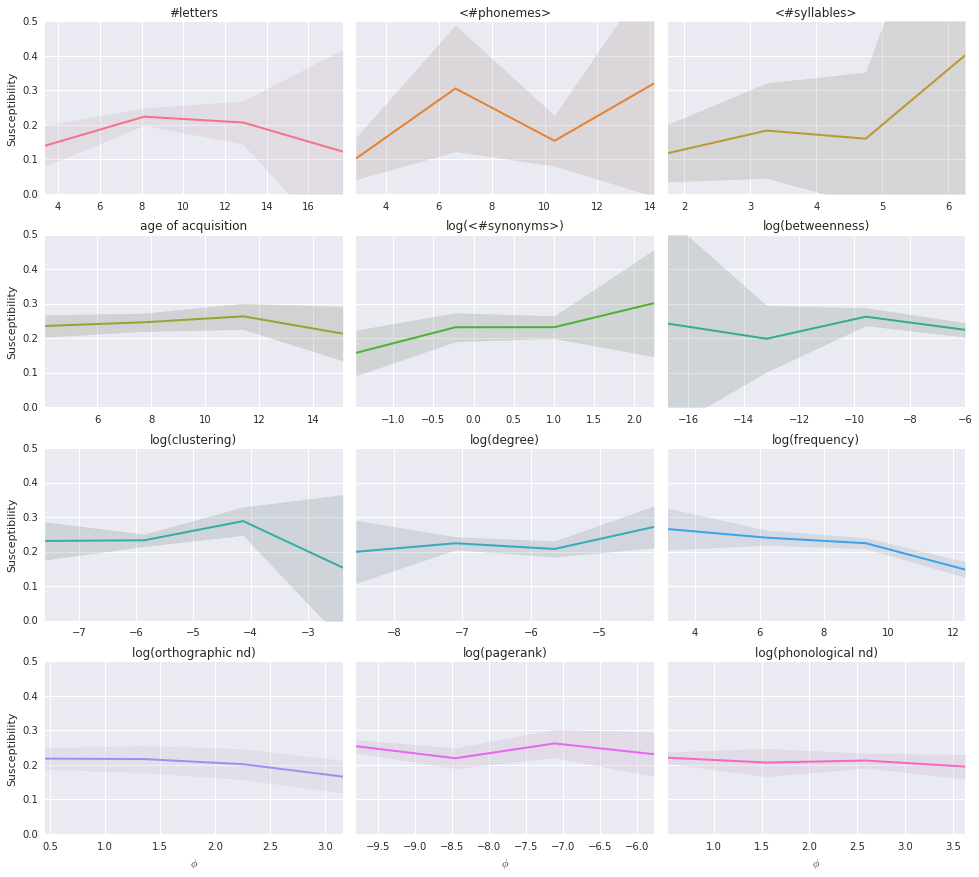

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=susties, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

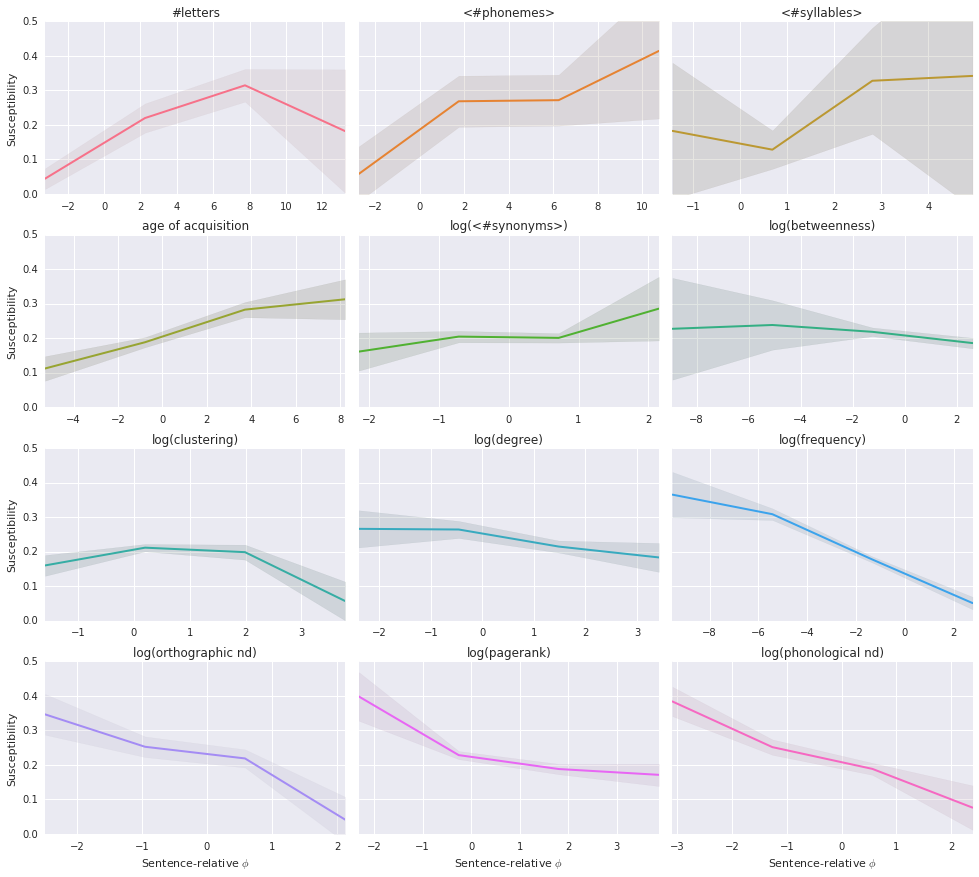

In [8]:
g = sb.FacetGrid(data=susties_rel, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on how confidence intervals are computed here**

There are three ways I can conceive of the computation represented in the graphs above:
1. For each word, we look at how many times it is substituted versus how many times it appears in a position where it could have been substituted. This is the *word*'s susceptibility, $\sigma(w)$. Then for each feature bin $b_i$ we take all the words such that $\phi(w) \in b_i$, average, and compute an asymptotic confidence interval based on how many words are in the bin. This fails for sentence-relative features, because a given word has different feature values depending on the sentence it appears in. So we discard this.
2. Do the same but at the feature value level. So we define a *feature value* susceptibility, $\sigma(f)$, and compute a confidence interval based on how many different feature values we have in the bin. The idea behind (1) and (2) is to look at the bin middle-value like the relevant object we're measuring, and we have several measures for each bin middle-value, hence the confidence interval. This is the way CIs are computed above.
3. Consider that we sample a multinomial process: each substitution is in fact the sampling of a feature value from one of the four bins. In that case, we can compute multinomial proportion CIs. This is also not satisfactory since in most cases not all feature values are available at the time of sampling, since most sentences don't range over all the feature's values. So for now I'm sticking with (2).

### 2.2 Feature susceptibilities, reduced to features we expose in the paper

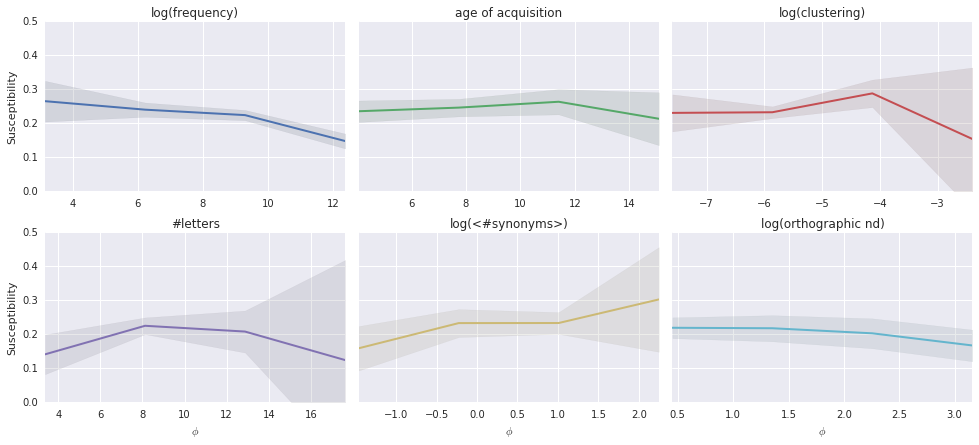

In [9]:
g = sb.FacetGrid(data=susties[susties['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

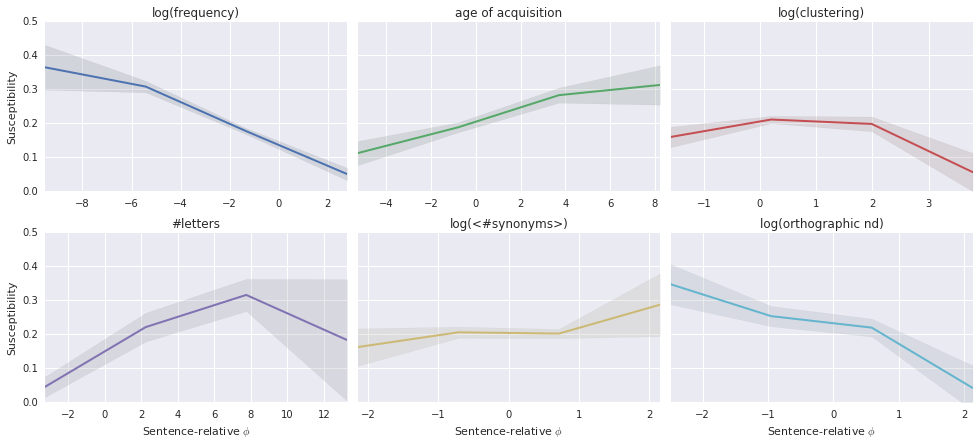

In [10]:
g = sb.FacetGrid(data=susties_rel[susties_rel['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

## 3 On which POS tags do substitutions fall?

In [11]:
poses = susty_words[susty_words.feature == 'aoa'][['POS', 'cluster_id', 'destination_id',
                                                   'occurrence', 'source_id', 'target',
                                                   'weight', 'weight_appeared', 'word']]
# Only take first letter of POS code to denote categories,
# and group stopword-like categories together.
stop_poses = ['C', 'F', 'I', 'M', 'P', 'S', 'U']
poses['rPOS'] = poses['POS']\
    .apply(lambda x: x[0])\
    .apply(lambda x: 'Stopword-like' if x in stop_poses else x)

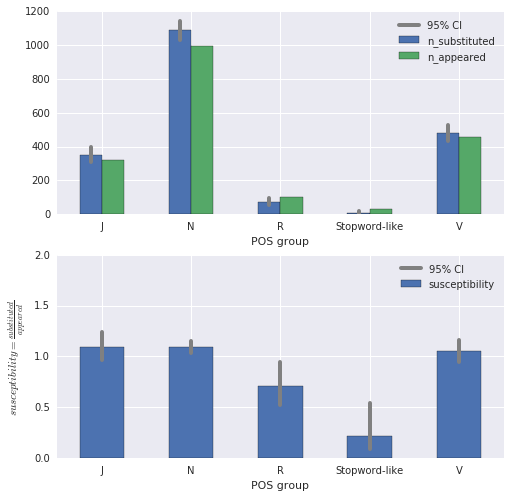

In [12]:
# Compute POS counts.
susty_pos = lambda x: ((x * poses.loc[x.index, 'weight']).sum() /
                       poses.loc[x.index, 'weight_appeared'].sum())
susties_pos = poses.groupby('rPOS')['target'].aggregate(
    {'susceptibility': susty_pos,
     'n_substituted': lambda x: (x * poses.loc[x.index, 'weight']).sum(),
     'n_appeared': lambda x: poses.loc[x.index, 'weight_appeared'].sum()}
).rename_axis('POS group')

# Plot.

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
# Raw substituted and appeared values.
susties_pos[['n_substituted', 'n_appeared']].plot(ax=axes[0], kind='bar', rot=0)
# With their CIs.
total_substituted = susties_pos.n_substituted.sum()
cis = multinomial_proportions_confint(susties_pos.n_substituted.round(), method='goodman')
for i in range(len(susties_pos)):
    axes[0].plot([i-.125, i-.125], cis[i] * total_substituted, lw=4, color='grey',
                 label='95% CI' if i == 0 else None)
axes[0].legend()
# Substitutability values.
susties_pos['susceptibility'].plot(ax=axes[1], kind='bar', legend=True, ylim=(0, 2), rot=0)
axes[1].set_ylabel(r'$susceptibility = \frac{substituted}{appeared}$')
# With their CIs.
for i in range(len(susties_pos)):
    axes[1].plot([i, i], cis[i] * total_substituted / susties_pos.n_appeared.iloc[i],
                 lw=4, color='grey', label='95% CI' if i == 0 else None)
axes[1].legend(loc='best')
# Save if necessary.
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-pos_susceptibilities'),
                bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all POS tags are available to sample from in all the sentences. There's no way out of this, so we're going to use multinomial CIs. We can safely scale all the bars and CIs to their respective `n_appeared` values, since that is an independent given before the sampling.

**Are the appeared and substituted proportions statistically different?**

The only test we can easily do is a multinomial goodness-of-fit. This tells us if the `n_substituted` counts are significantly different from the reference `n_appeared` counts.

From there on we know a few things:
* Comparing a given POS's `n_substituted` count to its reference `n_appeared` count tells us if it's statistically different (< or >). We know this will be true individually for any POS that is out of its confidence region for the global goodness-of-fit test, since it's a weaker hypothesis (so the null rejection region will be wider, and the POS we're looking at is already in the rejection region for the global test). We don't know if it'll be true or not for POSes that are in their confidence region for the global test.
* Jointly comparing two POS's `n_substituted` counts to their reference `n_appeared` counts tells us if there is bias for one w.r.t. the other. This is also true for all pairs of POSes that are on alternate sides of their confidence region in the global test (for the same reasons as in the previous point). We don't know if it's true for the other POSes though.

In [13]:
# Test the n_substituted proportions are different from the n_appeared proportions
total_appeared = susties_pos.n_appeared.sum()
appeared_cis = multinomial_proportions_confint(susties_pos.n_appeared.round(), method='goodman')
differences = [(s < ci[0] * total_appeared) or (s > ci[1] * total_appeared)
               for s, ci in zip(susties_pos.n_substituted, appeared_cis)]
are_different = np.any(differences)
if are_different:
    print("Appeared and substituted proportions are different with p < .05")
    print("The following POS tags are out of their confidence region:",
          list(susties_pos.index[np.where(differences)[0]]))
else:
    print("Appeared and substituted proportions cannot be "
          "said different with p value better than .05")

Appeared and substituted proportions are different with p < .05
The following POS tags are out of their confidence region: ['N', 'R', 'Stopword-like']


## 4 Susceptibility in terms of absolute fractiles

In [14]:
def plot_absolute_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')

    # Compute feature bins.
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_fractiles = pd.qcut(data.value, bin_count, labels=False)
            break
        except ValueError:
            pass

    # Compute bin counts
    heights = np.zeros(bin_count)
    for i in range(bin_count):
        heights[i] = data[data.target & (x_fractiles == i)].weight.sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, bin_count + 1), heights, color=color)
    plt.fill_between(range(1, bin_count + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, bin_count + 1))
    plt.xlim(1, bin_count)
    plt.ylim(0, None)

### 4.1 All features susceptibilities

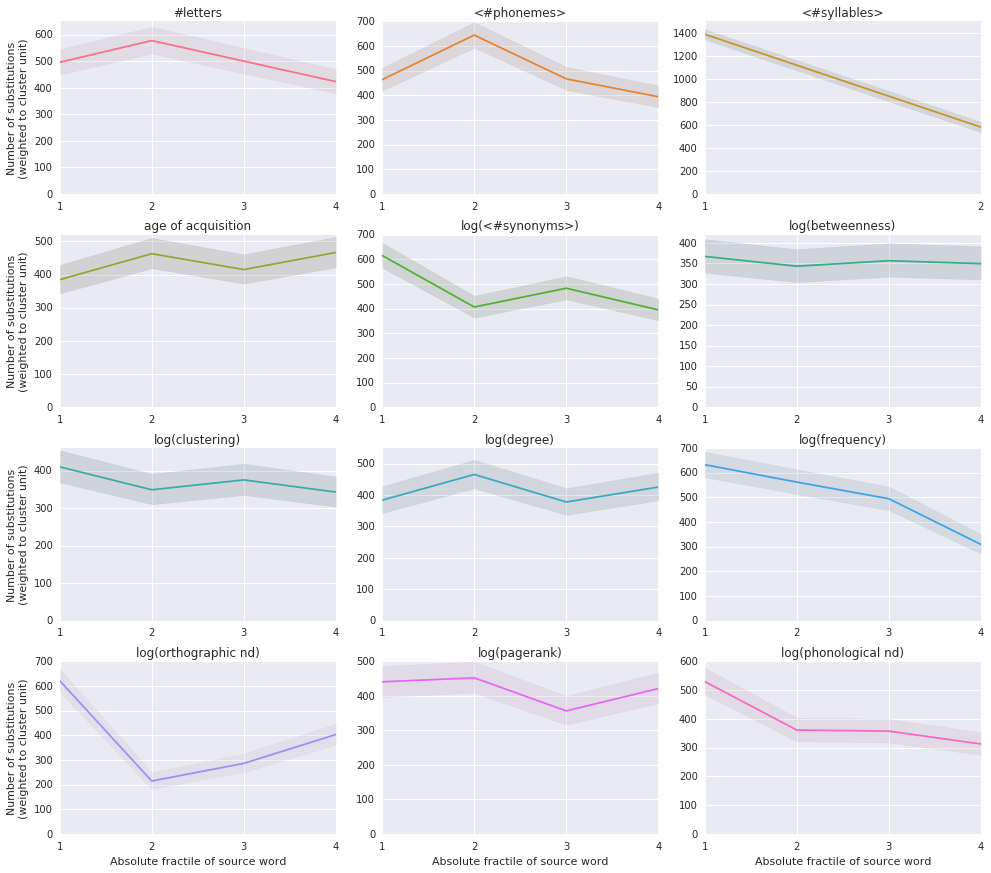

In [15]:
# Now plot.
g = sb.FacetGrid(data=susty_words, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're again in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all absolute feature fractiles are available to sample from in all the sentences. Again, there's no way out of this, so we're going to use multinomial CIs.

### 4.2 Feature susceptibilities, reduced to features we expose in the paper

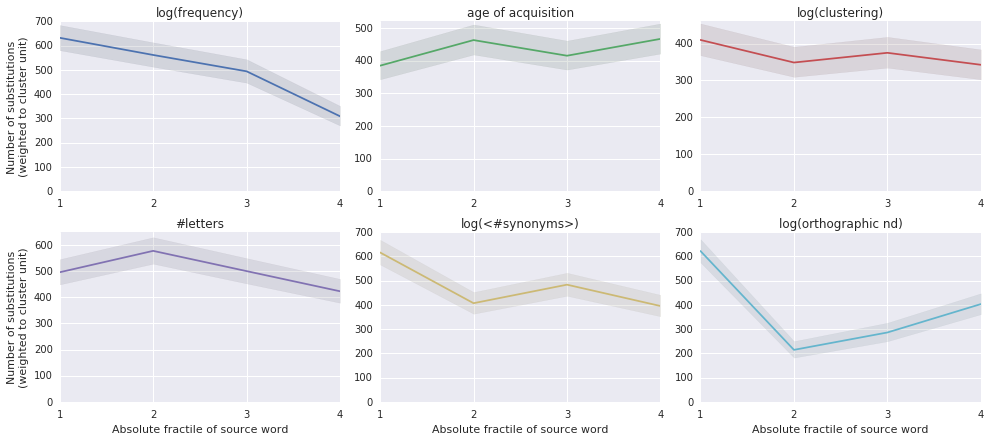

In [16]:
# Now plot.
g = sb.FacetGrid(data=susty_words[susty_words['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

## 5 Susceptibility in terms of sentence fractiles

Build our data.

In [17]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, _ = substitution.features(feature)
            if np.isnan(source):
                # The source word has no feature value. We drop this substitution.
                continue
            sentence, _ = substitution.source_destination_features(feature)
            # Remove stopwords from this analysis, since we dropped substitutions on stopwords.
            dslice = slice(substitution.start,
                           substitution.start + len(substitution.destination.tokens))
            is_stopword = np.array([(lemma in stopwords) or (token in stopwords)
                                    for (lemma, token) in
                                    zip(substitution.source.lemmas[dslice],
                                        substitution.source.tokens[dslice])])
            sentence[is_stopword] = np.nan
            # Find the number of bins we'll use.
            values = set(sentence[np.isfinite(sentence)])
            if len(values) == 0 or len(values) == 1:
                # Only NaNs, or only one feature value. Drop this.
                continue
            start, stop = None, None
            power = 0
            while start is None:
                if int(BIN_COUNT / 2**power) * 2**power != BIN_COUNT:
                    raise ValueError('BIN_COUNT must be a power of 2')
                try:
                    start = 2**power * pd.qcut(sentence, int(BIN_COUNT / 2**power),
                                               labels=False)[substitution.position]
                    stop = start + 2**power
                except ValueError:
                    power += 1
            # And finally save the bin.
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'start': start,
                         'stop': stop})

original_fractiles = pd.DataFrame(data)
del data

  0% (   64 of 24971) |                    | Elapsed Time: 0:00:01 ETA:  0:06:33

  0% (  149 of 24971) |                    | Elapsed Time: 0:00:02 ETA:  0:04:54

  0% (  234 of 24971) |                    | Elapsed Time: 0:00:03 ETA:  0:04:52

  1% (  313 of 24971) |                    | Elapsed Time: 0:00:03 ETA:  0:04:51

  1% (  399 of 24971) |                    | Elapsed Time: 0:00:04 ETA:  0:04:49

  1% (  486 of 24971) |                    | Elapsed Time: 0:00:05 ETA:  0:04:47

  2% (  572 of 24971) |                    | Elapsed Time: 0:00:06 ETA:  0:04:46

  2% (  625 of 24971) |                    | Elapsed Time: 0:00:07 ETA:  0:04:44

  2% (  706 of 24971) |                    | Elapsed Time: 0:00:08 ETA:  0:04:46

  3% (  785 of 24971) |                    | Elapsed Time: 0:00:09 ETA:  0:04:47

  3% (  859 of 24971) |                    | Elapsed Time: 0:00:10 ETA:  0:04:50

  3% (  937 of 24971) |                    | Elapsed Time: 0:00:11 ETA:  0:04:55

  4% ( 1025 of 24971) |                    | Elapsed Time: 0:00:12 ETA:  0:04:53

  4% ( 1116 of 24971) |                    | Elapsed Time: 0:00:13 ETA:  0:04:50

  4% ( 1206 of 24971) |                    | Elapsed Time: 0:00:14 ETA:  0:04:48

  5% ( 1249 of 24971) |#                   | Elapsed Time: 0:00:15 ETA:  0:04:53

  5% ( 1324 of 24971) |#                   | Elapsed Time: 0:00:16 ETA:  0:04:55

  5% ( 1393 of 24971) |#                   | Elapsed Time: 0:00:17 ETA:  0:04:59

  5% ( 1462 of 24971) |#                   | Elapsed Time: 0:00:18 ETA:  0:05:00

  6% ( 1528 of 24971) |#                   | Elapsed Time: 0:00:19 ETA:  0:05:04

  6% ( 1561 of 24971) |#                   | Elapsed Time: 0:00:19 ETA:  0:05:06

  6% ( 1642 of 24971) |#                   | Elapsed Time: 0:00:20 ETA:  0:05:09

  6% ( 1711 of 24971) |#                   | Elapsed Time: 0:00:21 ETA:  0:05:20

  7% ( 1799 of 24971) |#                   | Elapsed Time: 0:00:22 ETA:  0:05:19

  7% ( 1873 of 24971) |#                   | Elapsed Time: 0:00:23 ETA:  0:05:12

  7% ( 1964 of 24971) |#                   | Elapsed Time: 0:00:24 ETA:  0:05:02

  8% ( 2056 of 24971) |#                   | Elapsed Time: 0:00:25 ETA:  0:04:50

  8% ( 2152 of 24971) |#                   | Elapsed Time: 0:00:26 ETA:  0:04:36

  8% ( 2185 of 24971) |#                   | Elapsed Time: 0:00:26 ETA:  0:04:24

  9% ( 2262 of 24971) |#                   | Elapsed Time: 0:00:27 ETA:  0:04:24

  9% ( 2331 of 24971) |#                   | Elapsed Time: 0:00:28 ETA:  0:04:28

  9% ( 2408 of 24971) |#                   | Elapsed Time: 0:00:30 ETA:  0:04:23

 10% ( 2498 of 24971) |##                  | Elapsed Time: 0:00:30 ETA:  0:04:20

 10% ( 2587 of 24971) |##                  | Elapsed Time: 0:00:31 ETA:  0:04:18

 10% ( 2651 of 24971) |##                  | Elapsed Time: 0:00:32 ETA:  0:04:28

 10% ( 2737 of 24971) |##                  | Elapsed Time: 0:00:33 ETA:  0:04:30

 11% ( 2810 of 24971) |##                  | Elapsed Time: 0:00:34 ETA:  0:04:35

 11% ( 2890 of 24971) |##                  | Elapsed Time: 0:00:35 ETA:  0:04:38

 11% ( 2958 of 24971) |##                  | Elapsed Time: 0:00:36 ETA:  0:04:42

 12% ( 3033 of 24971) |##                  | Elapsed Time: 0:00:37 ETA:  0:04:38

 12% ( 3122 of 24971) |##                  | Elapsed Time: 0:00:38 ETA:  0:04:41

 12% ( 3208 of 24971) |##                  | Elapsed Time: 0:00:39 ETA:  0:04:41

 13% ( 3280 of 24971) |##                  | Elapsed Time: 0:00:40 ETA:  0:04:37

 13% ( 3359 of 24971) |##                  | Elapsed Time: 0:00:41 ETA:  0:04:40

 13% ( 3434 of 24971) |##                  | Elapsed Time: 0:00:42 ETA:  0:04:40

 14% ( 3547 of 24971) |##                  | Elapsed Time: 0:00:43 ETA:  0:04:22

 14% ( 3624 of 24971) |##                  | Elapsed Time: 0:00:44 ETA:  0:04:17

 14% ( 3705 of 24971) |##                  | Elapsed Time: 0:00:45 ETA:  0:04:13

 15% ( 3746 of 24971) |###                 | Elapsed Time: 0:00:46 ETA:  0:04:10

 15% ( 3837 of 24971) |###                 | Elapsed Time: 0:00:47 ETA:  0:04:06

 15% ( 3918 of 24971) |###                 | Elapsed Time: 0:00:48 ETA:  0:04:08

 16% ( 4002 of 24971) |###                 | Elapsed Time: 0:00:49 ETA:  0:04:02

 16% ( 4058 of 24971) |###                 | Elapsed Time: 0:00:50 ETA:  0:04:00

 16% ( 4144 of 24971) |###                 | Elapsed Time: 0:00:51 ETA:  0:03:57

 16% ( 4216 of 24971) |###                 | Elapsed Time: 0:00:52 ETA:  0:04:14

 17% ( 4291 of 24971) |###                 | Elapsed Time: 0:00:53 ETA:  0:04:14

 17% ( 4370 of 24971) |###                 | Elapsed Time: 0:00:54 ETA:  0:04:18

 17% ( 4451 of 24971) |###                 | Elapsed Time: 0:00:55 ETA:  0:04:22

 18% ( 4515 of 24971) |###                 | Elapsed Time: 0:00:56 ETA:  0:04:30

 18% ( 4594 of 24971) |###                 | Elapsed Time: 0:00:57 ETA:  0:04:32

 18% ( 4669 of 24971) |###                 | Elapsed Time: 0:00:58 ETA:  0:04:32

 18% ( 4683 of 24971) |###                 | Elapsed Time: 0:00:58 ETA:  0:04:43

 19% ( 4750 of 24971) |###                 | Elapsed Time: 0:00:59 ETA:  0:04:46

 19% ( 4820 of 24971) |###                 | Elapsed Time: 0:01:00 ETA:  0:04:48

 19% ( 4880 of 24971) |###                 | Elapsed Time: 0:01:01 ETA:  0:04:58

 19% ( 4952 of 24971) |###                 | Elapsed Time: 0:01:02 ETA:  0:04:55

 20% ( 4995 of 24971) |####                | Elapsed Time: 0:01:03 ETA:  0:04:59

 20% ( 5074 of 24971) |####                | Elapsed Time: 0:01:04 ETA:  0:04:48

 20% ( 5156 of 24971) |####                | Elapsed Time: 0:01:05 ETA:  0:04:45

 20% ( 5239 of 24971) |####                | Elapsed Time: 0:01:06 ETA:  0:04:39

 21% ( 5307 of 24971) |####                | Elapsed Time: 0:01:06 ETA:  0:04:30

 21% ( 5392 of 24971) |####                | Elapsed Time: 0:01:07 ETA:  0:04:20

 21% ( 5467 of 24971) |####                | Elapsed Time: 0:01:08 ETA:  0:04:16

 22% ( 5537 of 24971) |####                | Elapsed Time: 0:01:09 ETA:  0:04:10

 22% ( 5619 of 24971) |####                | Elapsed Time: 0:01:10 ETA:  0:04:03

 22% ( 5706 of 24971) |####                | Elapsed Time: 0:01:11 ETA:  0:03:59

 23% ( 5805 of 24971) |####                | Elapsed Time: 0:01:12 ETA:  0:03:49

 23% ( 5904 of 24971) |####                | Elapsed Time: 0:01:13 ETA:  0:03:41

 23% ( 5931 of 24971) |####                | Elapsed Time: 0:01:14 ETA:  0:03:40

 24% ( 6002 of 24971) |####                | Elapsed Time: 0:01:15 ETA:  0:03:44

 24% ( 6083 of 24971) |####                | Elapsed Time: 0:01:16 ETA:  0:03:45

 24% ( 6163 of 24971) |####                | Elapsed Time: 0:01:17 ETA:  0:03:42

 25% ( 6243 of 24971) |#####               | Elapsed Time: 0:01:18 ETA:  0:03:36

 25% ( 6330 of 24971) |#####               | Elapsed Time: 0:01:19 ETA:  0:03:34

 25% ( 6407 of 24971) |#####               | Elapsed Time: 0:01:20 ETA:  0:03:37

 26% ( 6495 of 24971) |#####               | Elapsed Time: 0:01:21 ETA:  0:03:41

 26% ( 6555 of 24971) |#####               | Elapsed Time: 0:01:22 ETA:  0:03:49

 26% ( 6632 of 24971) |#####               | Elapsed Time: 0:01:23 ETA:  0:03:50

 26% ( 6700 of 24971) |#####               | Elapsed Time: 0:01:24 ETA:  0:03:51

 27% ( 6772 of 24971) |#####               | Elapsed Time: 0:01:25 ETA:  0:03:54

 27% ( 6837 of 24971) |#####               | Elapsed Time: 0:01:27 ETA:  0:04:45

 27% ( 6868 of 24971) |#####               | Elapsed Time: 0:01:27 ETA:  0:04:49

 27% ( 6943 of 24971) |#####               | Elapsed Time: 0:01:28 ETA:  0:04:56

 28% ( 7018 of 24971) |#####               | Elapsed Time: 0:01:29 ETA:  0:04:55

 28% ( 7074 of 24971) |#####               | Elapsed Time: 0:01:30 ETA:  0:05:16

 28% ( 7180 of 24971) |#####               | Elapsed Time: 0:01:31 ETA:  0:05:09

 29% ( 7271 of 24971) |#####               | Elapsed Time: 0:01:32 ETA:  0:04:52

 29% ( 7348 of 24971) |#####               | Elapsed Time: 0:01:33 ETA:  0:04:47

 29% ( 7430 of 24971) |#####               | Elapsed Time: 0:01:34 ETA:  0:03:43

 30% ( 7492 of 24971) |######              | Elapsed Time: 0:01:35 ETA:  0:03:46

 30% ( 7564 of 24971) |######              | Elapsed Time: 0:01:36 ETA:  0:03:47

 30% ( 7638 of 24971) |######              | Elapsed Time: 0:01:37 ETA:  0:03:47

 30% ( 7736 of 24971) |######              | Elapsed Time: 0:01:38 ETA:  0:03:25

 31% ( 7804 of 24971) |######              | Elapsed Time: 0:01:39 ETA:  0:03:31

 31% ( 7891 of 24971) |######              | Elapsed Time: 0:01:40 ETA:  0:03:28

 31% ( 7970 of 24971) |######              | Elapsed Time: 0:01:41 ETA:  0:03:32

 32% ( 8060 of 24971) |######              | Elapsed Time: 0:01:42 ETA:  0:03:25

 32% ( 8116 of 24971) |######              | Elapsed Time: 0:01:43 ETA:  0:03:26

 32% ( 8204 of 24971) |######              | Elapsed Time: 0:01:44 ETA:  0:03:17

 33% ( 8289 of 24971) |######              | Elapsed Time: 0:01:45 ETA:  0:03:11

 33% ( 8370 of 24971) |######              | Elapsed Time: 0:01:46 ETA:  0:03:07

 33% ( 8428 of 24971) |######              | Elapsed Time: 0:01:47 ETA:  0:03:11

 34% ( 8500 of 24971) |######              | Elapsed Time: 0:01:48 ETA:  0:03:13

 34% ( 8582 of 24971) |######              | Elapsed Time: 0:01:49 ETA:  0:03:14

 34% ( 8663 of 24971) |######              | Elapsed Time: 0:01:50 ETA:  0:03:12

 35% ( 8740 of 24971) |#######             | Elapsed Time: 0:01:51 ETA:  0:03:15

 35% ( 8826 of 24971) |#######             | Elapsed Time: 0:01:52 ETA:  0:03:11

 35% ( 8899 of 24971) |#######             | Elapsed Time: 0:01:53 ETA:  0:03:17

 35% ( 8976 of 24971) |#######             | Elapsed Time: 0:01:54 ETA:  0:03:19

 36% ( 9052 of 24971) |#######             | Elapsed Time: 0:01:54 ETA:  0:03:16

 36% ( 9143 of 24971) |#######             | Elapsed Time: 0:01:55 ETA:  0:03:13

 36% ( 9224 of 24971) |#######             | Elapsed Time: 0:01:56 ETA:  0:03:07

 37% ( 9316 of 24971) |#######             | Elapsed Time: 0:01:57 ETA:  0:03:02

 37% ( 9365 of 24971) |#######             | Elapsed Time: 0:01:58 ETA:  0:02:59

 37% ( 9458 of 24971) |#######             | Elapsed Time: 0:01:59 ETA:  0:02:54

 38% ( 9541 of 24971) |#######             | Elapsed Time: 0:02:00 ETA:  0:02:55

 38% ( 9629 of 24971) |#######             | Elapsed Time: 0:02:01 ETA:  0:02:47

 38% ( 9677 of 24971) |#######             | Elapsed Time: 0:02:02 ETA:  0:02:42

 39% ( 9756 of 24971) |#######             | Elapsed Time: 0:02:03 ETA:  0:02:44

 39% ( 9835 of 24971) |#######             | Elapsed Time: 0:02:04 ETA:  0:02:48

 39% ( 9907 of 24971) |#######             | Elapsed Time: 0:02:05 ETA:  0:02:51

 40% ( 9989 of 24971) |########            | Elapsed Time: 0:02:06 ETA:  0:02:57

 40% (10086 of 24971) |########            | Elapsed Time: 0:02:07 ETA:  0:02:54

 40% (10184 of 24971) |########            | Elapsed Time: 0:02:08 ETA:  0:02:46

 41% (10268 of 24971) |########            | Elapsed Time: 0:02:09 ETA:  0:02:46

 41% (10301 of 24971) |########            | Elapsed Time: 0:02:09 ETA:  0:02:46

 41% (10399 of 24971) |########            | Elapsed Time: 0:02:10 ETA:  0:02:36

 41% (10484 of 24971) |########            | Elapsed Time: 0:02:11 ETA:  0:02:32

 42% (10566 of 24971) |########            | Elapsed Time: 0:02:12 ETA:  0:02:27

 42% (10613 of 24971) |########            | Elapsed Time: 0:02:13 ETA:  0:02:25

 42% (10698 of 24971) |########            | Elapsed Time: 0:02:14 ETA:  0:02:26

 43% (10784 of 24971) |########            | Elapsed Time: 0:02:15 ETA:  0:02:29

 43% (10864 of 24971) |########            | Elapsed Time: 0:02:16 ETA:  0:02:36

 43% (10925 of 24971) |########            | Elapsed Time: 0:02:16 ETA:  0:02:40

 44% (10998 of 24971) |########            | Elapsed Time: 0:02:17 ETA:  0:02:46

 44% (11097 of 24971) |########            | Elapsed Time: 0:02:18 ETA:  0:02:44

 44% (11178 of 24971) |########            | Elapsed Time: 0:02:19 ETA:  0:02:45

 45% (11237 of 24971) |#########           | Elapsed Time: 0:02:20 ETA:  0:02:44

 45% (11328 of 24971) |#########           | Elapsed Time: 0:02:21 ETA:  0:02:38

 45% (11412 of 24971) |#########           | Elapsed Time: 0:02:22 ETA:  0:02:37

 46% (11494 of 24971) |#########           | Elapsed Time: 0:02:23 ETA:  0:02:38

 46% (11550 of 24971) |#########           | Elapsed Time: 0:02:24 ETA:  0:02:36

 46% (11622 of 24971) |#########           | Elapsed Time: 0:02:25 ETA:  0:02:36

 46% (11704 of 24971) |#########           | Elapsed Time: 0:02:26 ETA:  0:02:31

 47% (11787 of 24971) |#########           | Elapsed Time: 0:02:27 ETA:  0:02:37

 47% (11862 of 24971) |#########           | Elapsed Time: 0:02:28 ETA:  0:02:32

 47% (11941 of 24971) |#########           | Elapsed Time: 0:02:29 ETA:  0:02:34

 48% (12021 of 24971) |#########           | Elapsed Time: 0:02:30 ETA:  0:02:37

 48% (12098 of 24971) |#########           | Elapsed Time: 0:02:31 ETA:  0:02:39

 48% (12174 of 24971) |#########           | Elapsed Time: 0:02:32 ETA:  0:02:40

 49% (12269 of 24971) |#########           | Elapsed Time: 0:02:33 ETA:  0:02:34

 49% (12339 of 24971) |#########           | Elapsed Time: 0:02:34 ETA:  0:02:34

 49% (12426 of 24971) |#########           | Elapsed Time: 0:02:35 ETA:  0:02:31

 50% (12486 of 24971) |##########          | Elapsed Time: 0:02:35 ETA:  0:02:30

 50% (12577 of 24971) |##########          | Elapsed Time: 0:02:36 ETA:  0:02:28

 50% (12668 of 24971) |##########          | Elapsed Time: 0:02:37 ETA:  0:02:23

 51% (12745 of 24971) |##########          | Elapsed Time: 0:02:38 ETA:  0:02:23

 51% (12798 of 24971) |##########          | Elapsed Time: 0:02:39 ETA:  0:02:22

 51% (12879 of 24971) |##########          | Elapsed Time: 0:02:40 ETA:  0:02:20

 51% (12946 of 24971) |##########          | Elapsed Time: 0:02:41 ETA:  0:02:31

 52% (13031 of 24971) |##########          | Elapsed Time: 0:02:42 ETA:  0:02:23

 52% (13110 of 24971) |##########          | Elapsed Time: 0:02:43 ETA:  0:02:19

 52% (13193 of 24971) |##########          | Elapsed Time: 0:02:44 ETA:  0:02:18

 53% (13279 of 24971) |##########          | Elapsed Time: 0:02:45 ETA:  0:02:19

 53% (13357 of 24971) |##########          | Elapsed Time: 0:02:46 ETA:  0:02:23

 53% (13422 of 24971) |##########          | Elapsed Time: 0:02:47 ETA:  0:02:21

 54% (13504 of 24971) |##########          | Elapsed Time: 0:02:48 ETA:  0:02:18

 54% (13587 of 24971) |##########          | Elapsed Time: 0:02:49 ETA:  0:02:16

 54% (13676 of 24971) |##########          | Elapsed Time: 0:02:50 ETA:  0:02:06

 55% (13735 of 24971) |###########         | Elapsed Time: 0:02:51 ETA:  0:02:05

 55% (13806 of 24971) |###########         | Elapsed Time: 0:02:52 ETA:  0:02:15

 55% (13877 of 24971) |###########         | Elapsed Time: 0:02:53 ETA:  0:02:19

 55% (13951 of 24971) |###########         | Elapsed Time: 0:02:54 ETA:  0:02:24

 56% (14047 of 24971) |###########         | Elapsed Time: 0:02:55 ETA:  0:02:20

 56% (14125 of 24971) |###########         | Elapsed Time: 0:02:56 ETA:  0:02:20

 56% (14206 of 24971) |###########         | Elapsed Time: 0:02:57 ETA:  0:02:20

 57% (14290 of 24971) |###########         | Elapsed Time: 0:02:58 ETA:  0:02:22

 57% (14359 of 24971) |###########         | Elapsed Time: 0:02:59 ETA:  0:02:22

 57% (14459 of 24971) |###########         | Elapsed Time: 0:03:00 ETA:  0:02:06

 58% (14538 of 24971) |###########         | Elapsed Time: 0:03:01 ETA:  0:02:01

 58% (14617 of 24971) |###########         | Elapsed Time: 0:03:02 ETA:  0:01:58

 58% (14671 of 24971) |###########         | Elapsed Time: 0:03:02 ETA:  0:02:01

 59% (14751 of 24971) |###########         | Elapsed Time: 0:03:03 ETA:  0:02:01

 59% (14841 of 24971) |###########         | Elapsed Time: 0:03:04 ETA:  0:01:55

 59% (14940 of 24971) |###########         | Elapsed Time: 0:03:05 ETA:  0:01:47

 60% (14983 of 24971) |############        | Elapsed Time: 0:03:06 ETA:  0:01:47

 60% (15069 of 24971) |############        | Elapsed Time: 0:03:07 ETA:  0:01:44

 60% (15170 of 24971) |############        | Elapsed Time: 0:03:08 ETA:  0:01:43

 61% (15256 of 24971) |############        | Elapsed Time: 0:03:09 ETA:  0:01:39

 61% (15295 of 24971) |############        | Elapsed Time: 0:03:09 ETA:  0:01:37

 61% (15383 of 24971) |############        | Elapsed Time: 0:03:10 ETA:  0:01:32

 61% (15471 of 24971) |############        | Elapsed Time: 0:03:11 ETA:  0:01:28

 62% (15544 of 24971) |############        | Elapsed Time: 0:03:12 ETA:  0:01:34

 62% (15607 of 24971) |############        | Elapsed Time: 0:03:13 ETA:  0:01:46

 62% (15684 of 24971) |############        | Elapsed Time: 0:03:14 ETA:  0:01:47

 63% (15788 of 24971) |############        | Elapsed Time: 0:03:15 ETA:  0:01:38

 63% (15874 of 24971) |############        | Elapsed Time: 0:03:16 ETA:  0:01:44

 63% (15920 of 24971) |############        | Elapsed Time: 0:03:17 ETA:  0:01:46

 64% (16012 of 24971) |############        | Elapsed Time: 0:03:18 ETA:  0:01:40

 64% (16095 of 24971) |############        | Elapsed Time: 0:03:19 ETA:  0:01:41

 64% (16185 of 24971) |############        | Elapsed Time: 0:03:20 ETA:  0:01:39

 65% (16232 of 24971) |#############       | Elapsed Time: 0:03:21 ETA:  0:01:33

 65% (16306 of 24971) |#############       | Elapsed Time: 0:03:22 ETA:  0:01:29

 65% (16383 of 24971) |#############       | Elapsed Time: 0:03:23 ETA:  0:01:28

 65% (16470 of 24971) |#############       | Elapsed Time: 0:03:24 ETA:  0:01:34

 66% (16544 of 24971) |#############       | Elapsed Time: 0:03:24 ETA:  0:01:34

 66% (16639 of 24971) |#############       | Elapsed Time: 0:03:25 ETA:  0:01:27

 66% (16697 of 24971) |#############       | Elapsed Time: 0:03:28 ETA:  0:02:24

 67% (16781 of 24971) |#############       | Elapsed Time: 0:03:29 ETA:  0:02:22

 67% (16856 of 24971) |#############       | Elapsed Time: 0:03:30 ETA:  0:02:27

 67% (16944 of 24971) |#############       | Elapsed Time: 0:03:31 ETA:  0:02:23

 68% (17039 of 24971) |#############       | Elapsed Time: 0:03:32 ETA:  0:02:11

 68% (17120 of 24971) |#############       | Elapsed Time: 0:03:33 ETA:  0:02:09

 68% (17168 of 24971) |#############       | Elapsed Time: 0:03:33 ETA:  0:02:15

 69% (17240 of 24971) |#############       | Elapsed Time: 0:03:34 ETA:  0:02:19

 69% (17326 of 24971) |#############       | Elapsed Time: 0:03:35 ETA:  0:02:22

 69% (17408 of 24971) |#############       | Elapsed Time: 0:03:36 ETA:  0:01:26

 70% (17480 of 24971) |##############      | Elapsed Time: 0:03:37 ETA:  0:01:23

 70% (17567 of 24971) |##############      | Elapsed Time: 0:03:38 ETA:  0:01:19

 70% (17655 of 24971) |##############      | Elapsed Time: 0:03:39 ETA:  0:01:17

 71% (17734 of 24971) |##############      | Elapsed Time: 0:03:40 ETA:  0:01:23

 71% (17792 of 24971) |##############      | Elapsed Time: 0:03:41 ETA:  0:01:22

 71% (17880 of 24971) |##############      | Elapsed Time: 0:03:42 ETA:  0:01:17

 71% (17955 of 24971) |##############      | Elapsed Time: 0:03:43 ETA:  0:01:14

 72% (18028 of 24971) |##############      | Elapsed Time: 0:03:44 ETA:  0:01:19

 72% (18104 of 24971) |##############      | Elapsed Time: 0:03:45 ETA:  0:01:13

 72% (18183 of 24971) |##############      | Elapsed Time: 0:03:46 ETA:  0:01:17

 73% (18266 of 24971) |##############      | Elapsed Time: 0:03:47 ETA:  0:01:18

 73% (18356 of 24971) |##############      | Elapsed Time: 0:03:48 ETA:  0:01:16

 73% (18417 of 24971) |##############      | Elapsed Time: 0:03:48 ETA:  0:01:14

 74% (18486 of 24971) |##############      | Elapsed Time: 0:03:49 ETA:  0:01:18

 74% (18563 of 24971) |##############      | Elapsed Time: 0:03:50 ETA:  0:01:22

 74% (18641 of 24971) |##############      | Elapsed Time: 0:03:51 ETA:  0:01:20

 75% (18729 of 24971) |###############     | Elapsed Time: 0:03:52 ETA:  0:01:19

 75% (18810 of 24971) |###############     | Elapsed Time: 0:03:53 ETA:  0:01:17

 75% (18894 of 24971) |###############     | Elapsed Time: 0:03:54 ETA:  0:01:15

 76% (18979 of 24971) |###############     | Elapsed Time: 0:03:56 ETA:  0:01:17

 76% (19041 of 24971) |###############     | Elapsed Time: 0:03:56 ETA:  0:01:13

 76% (19127 of 24971) |###############     | Elapsed Time: 0:03:57 ETA:  0:01:04

 76% (19206 of 24971) |###############     | Elapsed Time: 0:03:58 ETA:  0:01:02

 77% (19302 of 24971) |###############     | Elapsed Time: 0:03:59 ETA:  0:00:53

 77% (19353 of 24971) |###############     | Elapsed Time: 0:04:00 ETA:  0:00:49

 77% (19440 of 24971) |###############     | Elapsed Time: 0:04:01 ETA:  0:00:48

 78% (19527 of 24971) |###############     | Elapsed Time: 0:04:02 ETA:  0:00:44

 78% (19608 of 24971) |###############     | Elapsed Time: 0:04:03 ETA:  0:00:45

 78% (19665 of 24971) |###############     | Elapsed Time: 0:04:03 ETA:  0:00:44

 79% (19750 of 24971) |###############     | Elapsed Time: 0:04:04 ETA:  0:00:45

 79% (19840 of 24971) |###############     | Elapsed Time: 0:04:05 ETA:  0:00:43

 79% (19933 of 24971) |###############     | Elapsed Time: 0:04:06 ETA:  0:00:36

 80% (19977 of 24971) |################    | Elapsed Time: 0:04:07 ETA:  0:00:40

 80% (20056 of 24971) |################    | Elapsed Time: 0:04:08 ETA:  0:00:44

 80% (20141 of 24971) |################    | Elapsed Time: 0:04:09 ETA:  0:00:44

 81% (20233 of 24971) |################    | Elapsed Time: 0:04:10 ETA:  0:00:41

 81% (20289 of 24971) |################    | Elapsed Time: 0:04:11 ETA:  0:00:38

 81% (20371 of 24971) |################    | Elapsed Time: 0:04:12 ETA:  0:00:38

 81% (20462 of 24971) |################    | Elapsed Time: 0:04:13 ETA:  0:00:35

 82% (20546 of 24971) |################    | Elapsed Time: 0:04:14 ETA:  0:00:36

 82% (20602 of 24971) |################    | Elapsed Time: 0:04:14 ETA:  0:00:36

 82% (20679 of 24971) |################    | Elapsed Time: 0:04:15 ETA:  0:00:39

 83% (20762 of 24971) |################    | Elapsed Time: 0:04:16 ETA:  0:00:36

 83% (20838 of 24971) |################    | Elapsed Time: 0:04:17 ETA:  0:00:39

 83% (20914 of 24971) |################    | Elapsed Time: 0:04:18 ETA:  0:00:48

 84% (20994 of 24971) |################    | Elapsed Time: 0:04:19 ETA:  0:00:47

 84% (21076 of 24971) |################    | Elapsed Time: 0:04:20 ETA:  0:00:50

 84% (21164 of 24971) |################    | Elapsed Time: 0:04:21 ETA:  0:00:48

 85% (21226 of 24971) |#################   | Elapsed Time: 0:04:22 ETA:  0:00:47

 85% (21310 of 24971) |#################   | Elapsed Time: 0:04:23 ETA:  0:00:42

 85% (21401 of 24971) |#################   | Elapsed Time: 0:04:24 ETA:  0:00:38

 86% (21495 of 24971) |#################   | Elapsed Time: 0:04:25 ETA:  0:00:28

 86% (21538 of 24971) |#################   | Elapsed Time: 0:04:26 ETA:  0:00:21

 86% (21616 of 24971) |#################   | Elapsed Time: 0:04:27 ETA:  0:00:24

 86% (21713 of 24971) |#################   | Elapsed Time: 0:04:28 ETA:  0:00:16

 87% (21799 of 24971) |#################   | Elapsed Time: 0:04:29 ETA:  0:00:14

 87% (21850 of 24971) |#################   | Elapsed Time: 0:04:29 ETA:  0:00:13

 87% (21929 of 24971) |#################   | Elapsed Time: 0:04:30 ETA:  0:00:17

 88% (22004 of 24971) |#################   | Elapsed Time: 0:04:31 ETA:  0:00:20

 88% (22088 of 24971) |#################   | Elapsed Time: 0:04:32 ETA:  0:00:22

 88% (22162 of 24971) |#################   | Elapsed Time: 0:04:33 ETA:  0:00:25

 89% (22235 of 24971) |#################   | Elapsed Time: 0:04:34 ETA:  0:00:30

 89% (22322 of 24971) |#################   | Elapsed Time: 0:04:35 ETA:  0:00:25

 89% (22400 of 24971) |#################   | Elapsed Time: 0:04:36 ETA:  0:00:32

 90% (22474 of 24971) |##################  | Elapsed Time: 0:04:37 ETA:  0:00:30

 90% (22548 of 24971) |##################  | Elapsed Time: 0:04:38 ETA:  0:00:34

 90% (22620 of 24971) |##################  | Elapsed Time: 0:04:39 ETA:  0:00:36

 90% (22700 of 24971) |##################  | Elapsed Time: 0:04:40 ETA:  0:00:33

 91% (22787 of 24971) |##################  | Elapsed Time: 0:04:41 ETA:  0:00:37

 91% (22889 of 24971) |##################  | Elapsed Time: 0:04:42 ETA:  0:00:22

 91% (22967 of 24971) |##################  | Elapsed Time: 0:04:43 ETA:  0:00:25

 92% (23050 of 24971) |##################  | Elapsed Time: 0:04:44 ETA:  0:00:22

 92% (23099 of 24971) |##################  | Elapsed Time: 0:04:45 ETA:  0:00:22

 92% (23184 of 24971) |##################  | Elapsed Time: 0:04:46 ETA:  0:00:15

 93% (23274 of 24971) |##################  | Elapsed Time: 0:04:47 ETA:  0:00:06

 93% (23357 of 24971) |##################  | Elapsed Time: 0:04:48 ETA:  0:00:04

 93% (23411 of 24971) |##################  | Elapsed Time: 0:04:48 ETA:  0:00:00

 94% (23502 of 24971) |##################  | Elapsed Time: 0:04:49 ETA:  0:00:00

 94% (23589 of 24971) |##################  | Elapsed Time: 0:04:50 ETA:  0:00:02

 94% (23676 of 24971) |##################  | Elapsed Time: 0:04:51 ETA:  0:00:00

 95% (23723 of 24971) |################### | Elapsed Time: 0:04:52 ETA:  0:00:00

 95% (23804 of 24971) |################### | Elapsed Time: 0:04:53 ETA:  0:00:00

 95% (23878 of 24971) |################### | Elapsed Time: 0:04:54 ETA:  0:00:00

 95% (23969 of 24971) |################### | Elapsed Time: 0:04:55 ETA:  0:00:00

 96% (24035 of 24971) |################### | Elapsed Time: 0:04:56 ETA:  0:00:00

 96% (24110 of 24971) |################### | Elapsed Time: 0:04:57 ETA:  0:00:01

 96% (24200 of 24971) |################### | Elapsed Time: 0:04:58 ETA:  0:00:01

 97% (24283 of 24971) |################### | Elapsed Time: 0:04:59 ETA:  0:00:01

 97% (24347 of 24971) |################### | Elapsed Time: 0:04:59 ETA:  0:00:02

 97% (24411 of 24971) |################### | Elapsed Time: 0:05:00 ETA:  0:00:13

 98% (24486 of 24971) |################### | Elapsed Time: 0:05:01 ETA:  0:00:15

 98% (24560 of 24971) |################### | Elapsed Time: 0:05:02 ETA:  0:00:14

 98% (24659 of 24971) |################### | Elapsed Time: 0:05:04 ETA:  0:00:14

 99% (24753 of 24971) |################### | Elapsed Time: 0:05:05 ETA:  0:00:04

 99% (24841 of 24971) |################### | Elapsed Time: 0:05:06 ETA:  0:00:04

 99% (24925 of 24971) |################### | Elapsed Time: 0:05:07 ETA:  0:00:02

100% (24971 of 24971) |####################| Elapsed Time: 0:05:07 Time: 0:05:07


Compute the weight of each substitution, according to what other substitutions it's pooled with, and the size of its bin. Letting:
* $n_d(i) = \#\text{substitutions with same durl as substitution }i$
* and $n_c(i) = \#\text{substitutions with same cluster as substitution }i$ (counting substitutions with the same durl as one)
* $p(i) = \text{precision (width) of the bin we assigned to substitution }i$

Then we define the weight of a substitution $i$:
$$w(i) = \frac{1}{n_d(i) n_c(i) p(i)}$$

In [18]:
fractiles = original_fractiles.copy()
divide_sum = lambda x: x / x.sum()

# Weight is 1 at first.
fractiles['weight'] = 1
# Divided by the number of substitutions that share a durl.
fractiles['weight'] = fractiles\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
fractiles['weight'] = fractiles\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_sum)
# And finally divide by the precision of the bin we put a substitution in.
fractiles['weight'] = fractiles['weight'] / (fractiles['stop'] - fractiles['start'])

Now for each feature, count the sum of weights in each bin and plot that.

In [19]:
def plot_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    
    # Compute bin counts
    heights = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = data[(data['start'] <= i) & (i < data['stop'])]['weight'].sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, BIN_COUNT + 1), heights, color=color)
    plt.fill_between(range(1, BIN_COUNT + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, BIN_COUNT + 1))
    plt.ylim(0, None)

### 5.1 All features susceptibilities

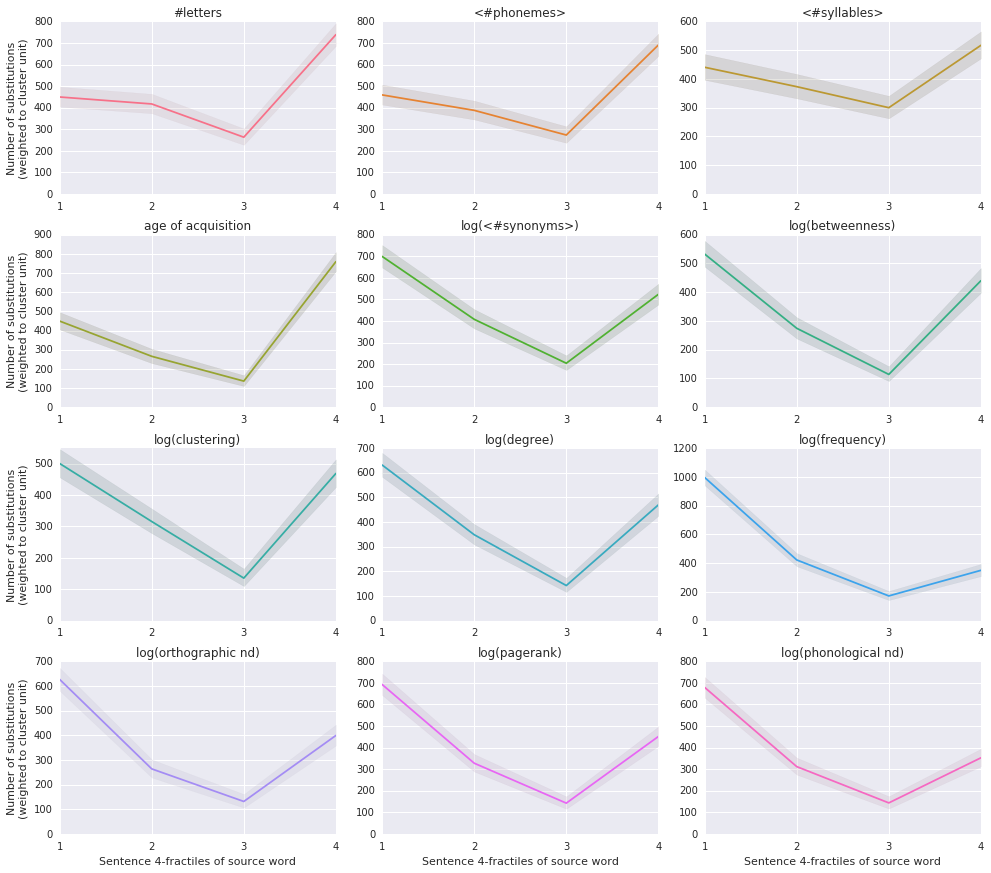

In [20]:
# Now plot.
g = sb.FacetGrid(data=fractiles, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're finally in a real multinomial sampling (and it's the only time). So we're going to use multinomial CIs.

### 5.2 Feature susceptibilities, reduced to features we expose in the paper

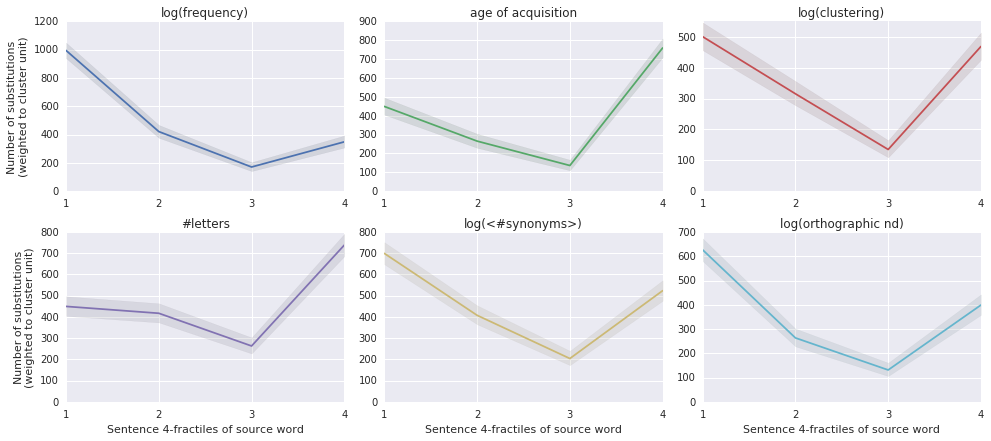

In [21]:
# Now plot.
g = sb.FacetGrid(data=fractiles[fractiles['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)